In [110]:
%load_ext autoreload
%autoreload 2
import torch as t
import matplotlib.pyplot as plt
from gninvert.functions import sort_with
from gninvert.graph_compare import model_compare
from gninvert.rule_discovery import *
from gninvert.hyperparamsearch import get_hyperparam_dtree, view_hp_results_graph, hp_stats
from gninvert.dtree import decision_tree_paths
from gninvert.gns import RecoveredGN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Strategy: do a baseline run with a wide range of hyperparameters, then emphasise the more successful ones when selecting later fine-tuned hyperparameters for the different models.

# Baseline run

## diff1
Single-chemical diffusion model.

Stats for 20 steps for node features:
Greatest relative difference: 109.94752645492554%
Average relative difference: 104.57100450992584%
Smallest relative difference: 100.06433725357056%
Greatest absolute difference: 0.07354992628097534
Average absolute difference: 0.031338351359590885
Smallest absolute difference: 0.00044345855712890625%


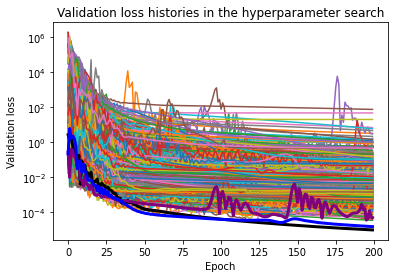

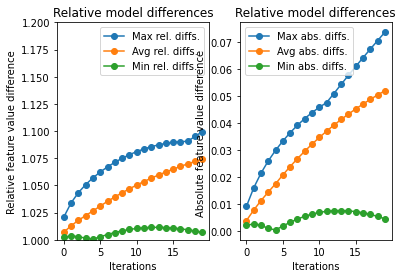

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


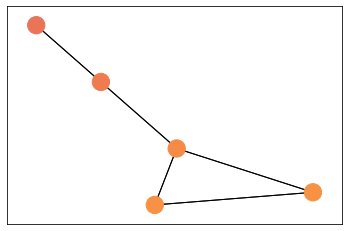

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


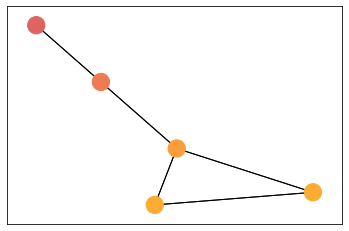

tensor([[0.8129],
        [0.8129],
        [0.7766],
        [0.6749],
        [0.5956]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                   5
loss                                  0.002937
score                                 1.115411
equation             ((xs - xt) * -0.49122822)
sympy_format    -0.49122822*xs + 0.49122822*xt
Name: 2, dtype: object, 'update_sr_result': complexity                    3
loss                   0.001914
score                  0.883713
equation        (a * 0.8272837)
sympy_format        0.8272837*a
Name: 1, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle True>}


In [55]:
gn1, hps1, model1, sr1 = view_run_results('runs/baseline_diff1')

In [61]:
decision_tree_paths(get_hyperparam_dtree(hps1, eq_threshold=3))[:5]

[[(3, (16, 16, 16)),
  ('loss_func', MSELoss()),
  ('regularization_coefficient', 1e-05),
  (5, False),
  ('regularization_norm', 1),
  -3.629037299942607],
 [(3, (16, 16, 16)),
  ('loss_func', MSELoss()),
  ('regularization_coefficient', False),
  ('regularization_norm', 2),
  -3.4817160925387567],
 [(3, (32, 32)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_coefficient', False),
  -3.335030052870653],
 [(3, (64,)), ('loss_func', MSELoss()), (5, False), -3.2745841966908054],
 [(3, (32, 32)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_coefficient', 1e-05),
  -3.2589264483966263]]

In [101]:
get_hyperparam_dtree(hps1, eq_threshold=4)

<<<DTREE on <ATTRIBUTE 3 taking values ([64], [32, 32], [256], [16, 16, 16], [1024])
  --((64,))-->
  <<<DTREE on <ATTRIBUTE loss_func taking values (MSELoss(), L1Loss())
    --(MSELoss())-->
    <<<DTREE on <ATTRIBUTE 5 taking values (False, True)
      --(False)-->
      <LEAF of avg.val (-3.2745841966908067, 1) with 48 examples and variance 1.680455350701608e-06>
      --(True)-->
      <LEAF of avg.val (-1.7942788892499504, 1) with 48 examples and variance 0.06740183567841151> >>>
    --(L1Loss())-->
    <LEAF of avg.val (-1.2427720038401333, 1) with 96 examples and variance 0.16520314068934858> >>>
  --((32, 32))-->
  <<<DTREE on <ATTRIBUTE 5 taking values (False, True)
    --(False)-->
    <<<DTREE on <ATTRIBUTE loss_func taking values (MSELoss(), L1Loss())
      --(MSELoss())-->
      <LEAF of avg.val (-3.18742883605065, 1) with 48 examples and variance 3.02468095424262e-05>
      --(L1Loss())-->
      <LEAF of avg.val (-1.7478430862942886, 1) with 48 examples and variance 0.001

Stats for 20 steps for node features:
Greatest relative difference: 124.89792108535767%
Average relative difference: 113.50641608238222%
Smallest relative difference: 100.45691728591919%
Greatest absolute difference: 0.1473921537399292
Average absolute difference: 0.08379440065473318
Smallest absolute difference: 0.0025328993797302246%


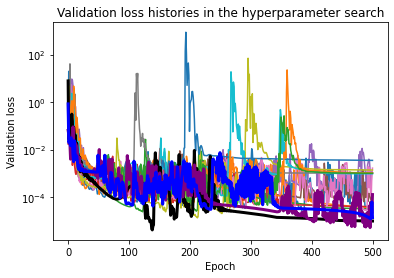

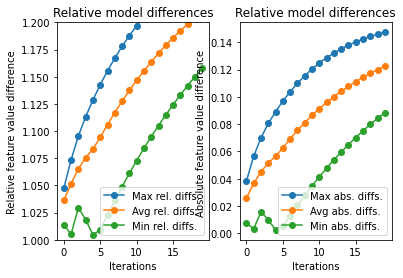

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


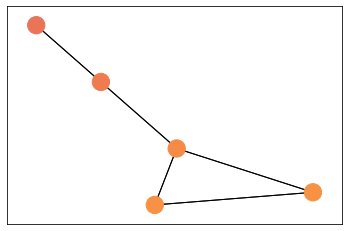

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


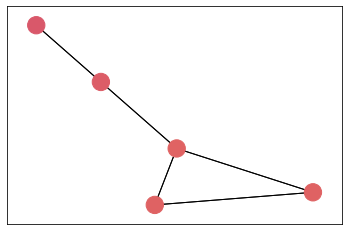

tensor([[0.5920],
        [0.5920],
        [0.5956],
        [0.5766],
        [0.5608]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                 5
loss                                0.002551
score                               1.149739
equation             ((xt - xs) * 0.4405458)
sympy_format    -0.4405458*xs + 0.4405458*xt
Name: 2, dtype: object, 'update_sr_result': complexity                                                      9
loss                                                     0.000079
score                                                    1.109438
equation        (((xt * -0.18841437) + (a * 0.8767918)) - -0.0...
sympy_format             0.8767918*a - 0.18841437*xt + 0.06518044
Name: 4, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle True>}


In [107]:
gn1b, hps1b, model1b, sr1b = view_run_results('runs/search1_diff1')

Stats for 20 steps for node features:
Greatest relative difference: 113.38013410568237%
Average relative difference: 106.91045641899109%
Smallest relative difference: 100.16235113143921%
Greatest absolute difference: 0.08725500106811523
Average absolute difference: 0.045727410819381475
Smallest absolute difference: 0.0009205341339111328%


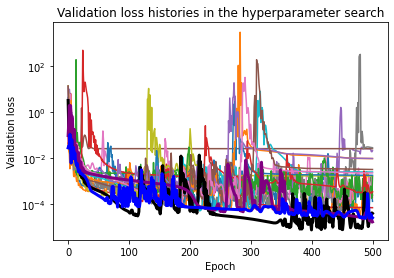

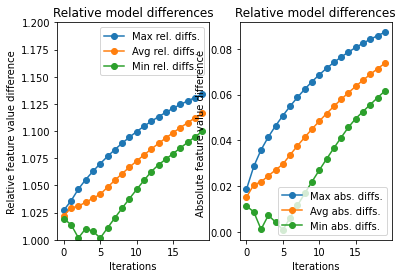

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


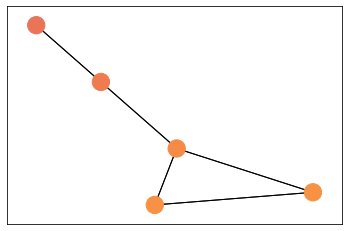

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


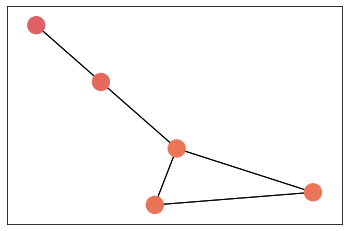

tensor([[0.6521],
        [0.6521],
        [0.6562],
        [0.6179],
        [0.5831]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                 5
loss                                0.000765
score                               1.345142
equation             ((xt - xs) * 0.2915225)
sympy_format    -0.2915225*xs + 0.2915225*xt
Name: 2, dtype: object, 'update_sr_result': complexity                                                      9
loss                                                     0.000141
score                                                    1.177559
equation        (((a * 0.82979393) + (xt * -0.28743544)) + 0.0...
sympy_format            0.82979393*a - 0.28743544*xt + 0.09392325
Name: 4, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle False>}


In [108]:
gn1c, hps1c, model1c, sr1c = view_run_results('runs/search1_no_shuffle_diff1')

In [118]:
decision_tree_paths(get_hyperparam_dtree(hps1c, eq_threshold=0.1))

[[('regularization_coefficient', 1e-05),
  (3, (16, 16, 16)),
  -3.345934854252621],
 [('regularization_coefficient', 1e-05), (3, (64,)), -3.1947081519686056],
 [('regularization_coefficient', False), (3, (64,)), -2.9142702334241286],
 [('regularization_coefficient', False),
  (3, (16, 16, 16)),
  -2.7467147474363207]]

## diff2

In [70]:
path = 'runs/baseline_diff2'
gn = t.load(path + '/gn')
hpsearch = t.load(path + '/hpsearch')
resorted = sort_with(model_pred_acc_fn_maker(gn), hpsearch)
t.save(resorted, path + "/hpsearch")
t.save(resorted[0]['model'], path + "/model")

Stats for 20 steps for node features:
Greatest relative difference: 153.85520458221436%
Average relative difference: 119.90203857421875%
Smallest relative difference: 100.07375478744507%
Greatest absolute difference: 0.2656579613685608
Average absolute difference: 0.10490436591207981
Smallest absolute difference: 0.00043070316314697266%


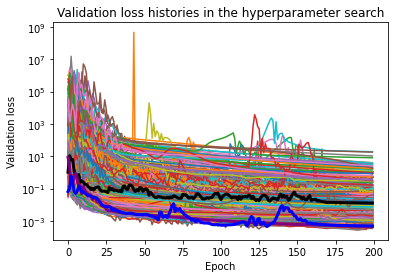

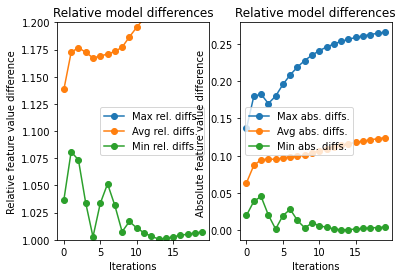

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


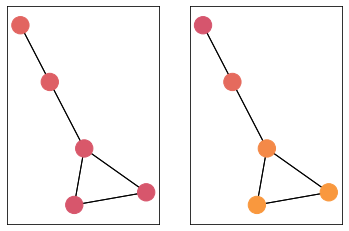

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])
The ground truth model finished the run outputting this graph:


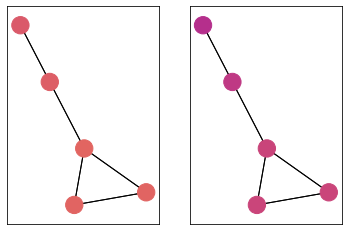

tensor([[0.5983, 0.4933],
        [0.5983, 0.4933],
        [0.6023, 0.4921],
        [0.5806, 0.4501],
        [0.5628, 0.4145]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                      3
loss                     0.005139
score                    1.203953
equation        (0.5493829 - xs2)
sympy_format      0.5493829 - xs2
Name: 1, dtype: object, complexity                       3
loss                      0.008877
score                     0.849508
equation        (xs1 + -0.5145786)
sympy_format       xs1 - 0.5145786
Name: 1, dtype: object], 'update_sr_result': [complexity                                                      9
loss                                                     0.000136
score                                                    1.284124
equation        (((xt2 * 0.1387075) - (a1 * -0.54874724)) + 0....
sympy_format           0.54874724*a1 + 0.1387075*xt2 + 0.23115744
Name: 4, dtype: object, complexity                                      5
l

In [71]:
gn2, hps2, model2, sr2 = view_run_results('runs/baseline_diff2')

In [72]:
decision_tree_paths(get_hyperparam_dtree(hps2, eq_threshold=1))[:5]

[[(3, (64,)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_norm', 1),
  ('regularization_coefficient', 1e-05),
  ('lr_scheduler_patience', 25),
  -3.0106295005379113],
 [(3, (64,)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_norm', 2),
  ('lr_scheduler_patience', 75),
  -2.9504645028012995],
 [(3, (16, 16, 16)),
  ('loss_func', MSELoss()),
  ('regularization_coefficient', False),
  ('lr_scheduler_patience', 25),
  (5, False),
  ('regularization_norm', 1),
  -2.9386366269014155],
 [(3, (32, 32)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_coefficient', 1e-05),
  ('lr_scheduler_patience', 75),
  -2.831927464209348],
 [(3, (64,)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_norm', 2),
  ('lr_scheduler_patience', 25),
  -2.824284536456425]]

- MSE
- shallow nets ... ?

## act_inh_simple

In [64]:
path = 'runs/baseline_act_inh_simple'
gn = t.load(path + '/gn')
hpsearch = t.load(path + '/hpsearch')
resorted = sort_with(model_pred_acc_fn_maker(gn), hpsearch)
t.save(resorted, path + "/hpsearch")
t.save(resorted[0]['model'], path + "/model")

Stats for 20 steps for node features:
Greatest relative difference: 141.48504734039307%
Average relative difference: 108.20847511291505%
Smallest relative difference: 100.09636878967285%
Greatest absolute difference: 0.34988582134246826
Average absolute difference: 0.05733142951503396
Smallest absolute difference: 0.0007101893424987793%


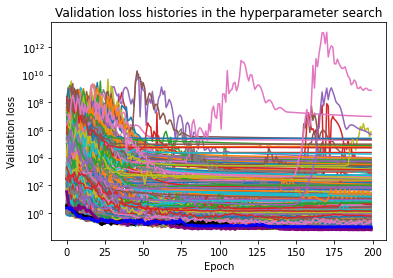

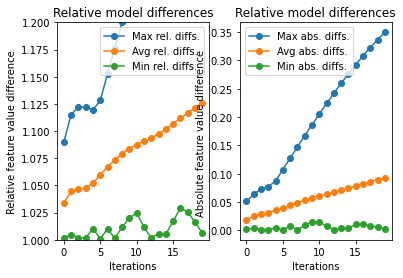

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


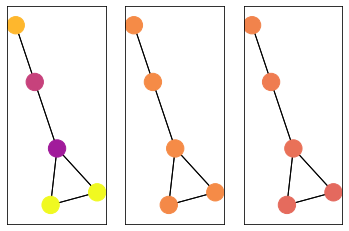

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
The ground truth model finished the run outputting this graph:


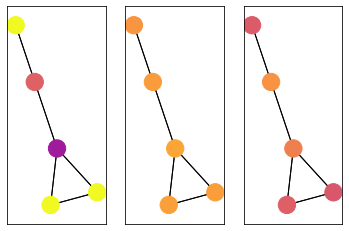

tensor([[1.2338, 0.7737, 0.5547],
        [1.1889, 0.7802, 0.5836],
        [0.3455, 0.7933, 0.6850],
        [0.5862, 0.7702, 0.7425],
        [1.1933, 0.7527, 0.5723]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                      3
loss                     4.175043
score                    0.725578
equation        (xt1 * 14.831995)
sympy_format        14.831995*xt1
Name: 1, dtype: object, complexity                     3
loss                    89.23585
score                   0.564562
equation        (xt1 * 72.70351)
sympy_format        72.70351*xt1
Name: 1, dtype: object], 'update_sr_result': [complexity                                      5
loss                                    195.27927
score                                    1.355379
equation        ((xt1 * -254.93794) + -108.15833)
sympy_format           -254.93794*xt1 - 108.15833
Name: 2, dtype: object, complexity                              5
loss                             0.124725
score            

In [65]:
gna, hpsa, modela, sra = view_run_results('runs/baseline_act_inh_simple')

In [77]:
decision_tree_paths(get_hyperparam_dtree(hpsa, eq_threshold=1))[:7]

[[('loss_func', L1Loss()), (5, False), (3, (64,)), -1.0475481344058701],
 [('loss_func', L1Loss()),
  (5, False),
  (3, (16, 16, 16)),
  ('lr_scheduler_patience', 25),
  ('regularization_norm', 1),
  -0.893786704962113],
 [('loss_func', L1Loss()), (5, False), (3, (256,)), -0.8881915131722237],
 [('loss_func', L1Loss()),
  (5, False),
  (3, (32, 32)),
  ('regularization_coefficient', 0.001),
  -0.843481601593858],
 [('loss_func', L1Loss()),
  (5, False),
  (3, (32, 32)),
  ('regularization_coefficient', False),
  ('lr_scheduler_patience', 25),
  ('regularization_norm', 1),
  -0.7755027865312845],
 [('loss_func', L1Loss()),
  (5, False),
  (3, (32, 32)),
  ('regularization_coefficient', 1e-05),
  -0.7430628901252843],
 [('loss_func', L1Loss()),
  (5, False),
  (3, (16, 16, 16)),
  ('lr_scheduler_patience', 25),
  ('regularization_norm', 2),
  ('regularization_coefficient', False),
  -0.6911369402734463]]

### baseline run for act_inh_simple: conclusions
Parameter settings:
- L1Loss
- no last nonlinearity
- (?) wide rather than deep

Other:
- look at graph above; many starting to flatline, so probably need to explore more widely ... more complex models good if train longer?

# Refinements

## diff1

Stats for 20 steps for node features:
Greatest relative difference: 105.67388534545898%
Average relative difference: 103.18490326404573%
Smallest relative difference: 100.10987520217896%
Greatest absolute difference: 0.04122030735015869
Average absolute difference: 0.022094496199861167
Smallest absolute difference: 0.0007819533348083496%


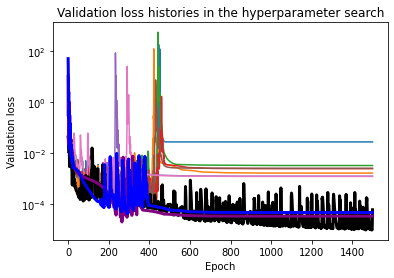

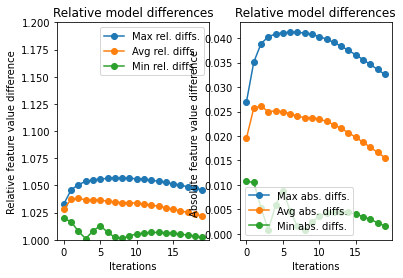

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


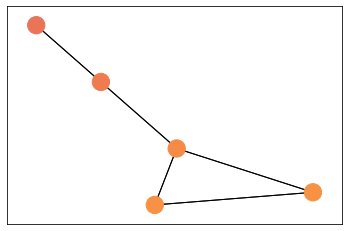

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


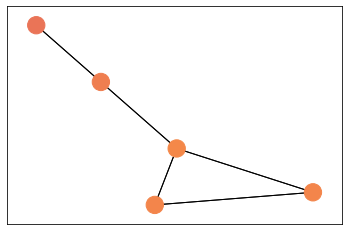

tensor([[0.7068],
        [0.7068],
        [0.7131],
        [0.6810],
        [0.6513]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                  5
loss                                 0.000242
score                                1.740505
equation            ((xt - xs) * -0.24516167)
sympy_format    0.24516167*xs - 0.24516167*xt
Name: 2, dtype: object, 'update_sr_result': complexity                                                9
loss                                               0.000816
score                                              0.538951
equation        (a + ((0.5053277 - (a * 0.37709332)) * xt))
sympy_format              a + xt*(0.5053277 - 0.37709332*a)
Name: 4, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle False>}


In [123]:
gn1x, hps1x, model1x, sr1x = view_run_results('runs/PRECISE1_diff1')

In [124]:
hp_stats(hps1x, gn1x)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-05,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 1500,
   1: 1,
   2: 1,
   3: [64],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 3.390394340385683e-05},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-05,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 1500,
   1: 1,
   2: 1,
   3: [16, 16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.03838062770664692}}

## diff2

Stats for 20 steps for node features:
Greatest relative difference: 138.02587985992432%
Average relative difference: 108.43509018421173%
Smallest relative difference: 100.03756284713745%
Greatest absolute difference: 0.1528186798095703
Average absolute difference: 0.04899530010297894
Smallest absolute difference: 0.0002002716064453125%


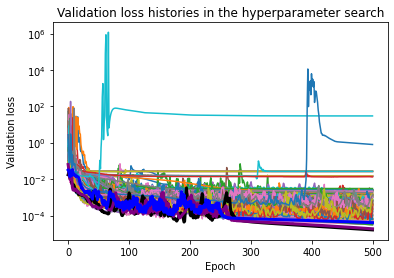

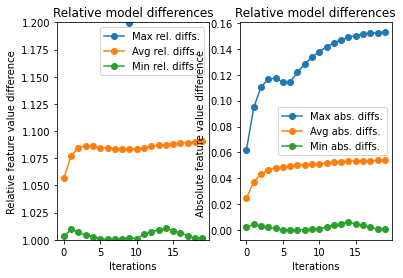

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


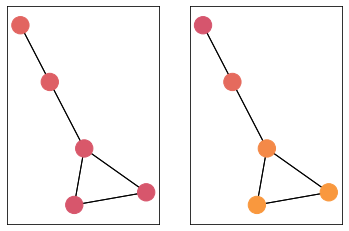

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])
The ground truth model finished the run outputting this graph:


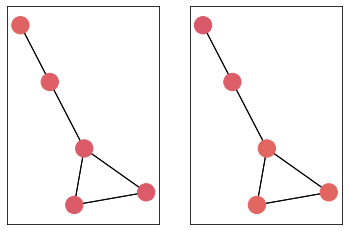

tensor([[0.5720, 0.6062],
        [0.5719, 0.6061],
        [0.5735, 0.6047],
        [0.5855, 0.5794],
        [0.5944, 0.5625]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                                                      9
loss                                                     0.000674
score                                                    0.754506
equation        ((((xs2 * -1.8978072) + xs1) + xt2) * -0.17295...
sympy_format    -0.17295937*xs1 + 0.328243537693464*xs2 - 0.17...
Name: 4, dtype: object, complexity                                   5
loss                                  0.002205
score                                  1.18705
equation             ((xt1 - xs1) * 0.4140797)
sympy_format    -0.4140797*xs1 + 0.4140797*xt1
Name: 2, dtype: object], 'update_sr_result': [complexity                      3
loss                     0.004837
score                    0.858164
equation        (a1 - 0.14857969)
sympy_format      a1 - 0.14857969
Name: 1, dtype:

In [74]:
gn2a, hps2a, model2a, sr2a = view_run_results('runs/diff2_try2_diff2')

Stats for 20 steps for node features:
Greatest relative difference: 106.07551336288452%
Average relative difference: 102.04270780086517%
Smallest relative difference: 100.00346899032593%
Greatest absolute difference: 0.03659099340438843
Average absolute difference: 0.012455982179380954
Smallest absolute difference: 1.4841556549072266e-05%


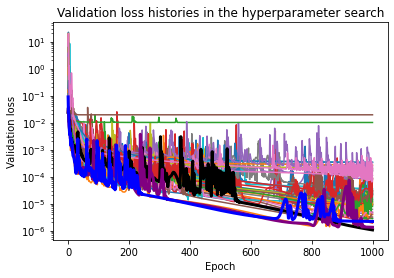

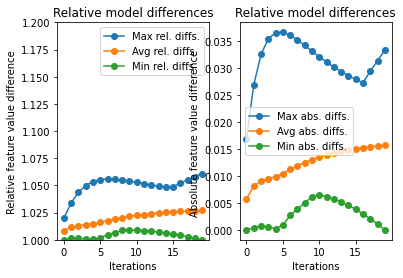

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


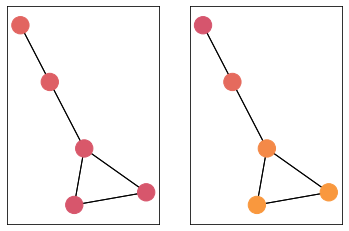

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])
The ground truth model finished the run outputting this graph:


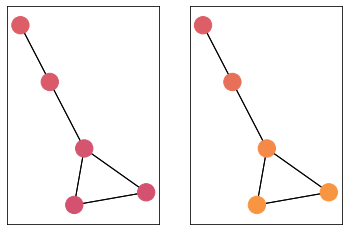

tensor([[0.5384, 0.7505],
        [0.5382, 0.7505],
        [0.5446, 0.7186],
        [0.5649, 0.6369],
        [0.5797, 0.5811]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                                                      9
loss                                                     0.000757
score                                                    1.432465
equation              ((xt2 - ((xs2 + xt1) - xs1)) * -0.28932345)
sympy_format    -0.28932345*xs1 + 0.28932345*xs2 + 0.28932345*...
Name: 4, dtype: object, complexity                                                      9
loss                                                     0.000556
score                                                    1.715999
equation               ((xt1 + ((xt2 - xs2) - xs1)) * 0.35008064)
sympy_format    -0.35008064*xs1 - 0.35008064*xs2 + 0.35008064*...
Name: 4, dtype: object], 'update_sr_result': [complexity                       3
loss                      0.004354
score               

In [76]:
gn2b, hps2b, model2b, sr2b = view_run_results('runs/diff2_try3_diff2')

In [119]:
decision_tree_paths(get_hyperparam_dtree(hps2b, eq_threshold=1))

[[(3, (16,)), -5.590314141575145],
 [(3, (16, 16, 16)), -4.6126097997071405],
 [(3, (8, 8, 8)), -4.583299212747896],
 [(3, (64,)), -3.889197813988247]]

## act_inh_simple

Stats for 20 steps for node features:
Greatest relative difference: 162.64898777008057%
Average relative difference: 113.22258114814758%
Smallest relative difference: 100.09932518005371%
Greatest absolute difference: 0.21039897203445435
Average absolute difference: 0.063281643204391
Smallest absolute difference: 0.0006281733512878418%


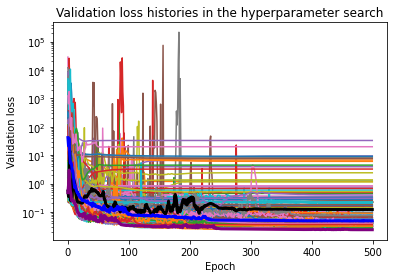

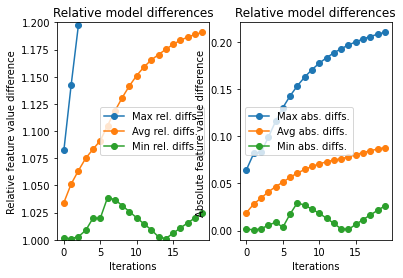

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


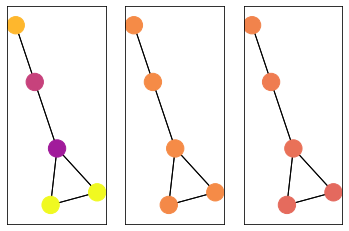

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
The ground truth model finished the run outputting this graph:


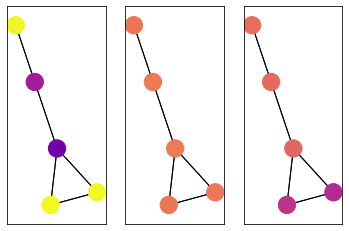

tensor([[1.0601, 0.6623, 0.4052],
        [1.0438, 0.6572, 0.4341],
        [0.2185, 0.6757, 0.6055],
        [0.3488, 0.6693, 0.6188],
        [0.9876, 0.6563, 0.6318]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                                                     11
loss                                                     0.000192
score                                                    0.896449
equation        ((((xt3 + xt1) * 0.13152298) - (xs2 * -0.52019...
sympy_format    0.5201924*xs2 + 0.13152298*xt1 + 0.13152298*xt...
Name: 5, dtype: object, complexity                                                     11
loss                                                     0.000075
score                                                    1.332015
equation        (((xs2 - ((xt1 + xt3) * -0.2376773)) * -0.4812...
sympy_format    -0.48124504*xs2 - 0.114381021745592*xt1 - 0.11...
Name: 4, dtype: object], 'update_sr_result': [complexity                                        

In [79]:
gnaa, hpsaa, modelaa, sraa = view_run_results('runs/searches_act_inh_simple')

In [82]:
decision_tree_paths(get_hyperparam_dtree(hpsaa, eq_threshold=1))

[[(3, (256,)),
  ('lr_scheduler_patience', 75),
  ('regularization_coefficient', 0.001),
  -1.4580722341758698],
 [(3, (64,)), -1.4255266410851137],
 [(3, (512,)), ('regularization_coefficient', 0.001), -1.3327478011218665],
 [(3, (256,)),
  ('lr_scheduler_patience', 75),
  ('regularization_coefficient', False),
  -1.2888592716092302],
 [(3, (256,)),
  ('lr_scheduler_patience', 25),
  ('regularization_coefficient', False),
  -1.2721953165611086],
 [(3, (256,)),
  ('lr_scheduler_patience', 25),
  ('regularization_coefficient', 0.001),
  -1.1791183710567945],
 [(3, (64, 64)),
  ('regularization_coefficient', 0.001),
  ('lr_scheduler_patience', 25),
  -1.0679929726685198],
 [(3, (64, 64)),
  ('regularization_coefficient', 0.001),
  ('lr_scheduler_patience', 75),
  -1.0359412680563254],
 [(3, (32, 32, 32)),
  ('regularization_coefficient', 0.001),
  -0.9568310654047147],
 [(3, (64, 64)),
  ('regularization_coefficient', False),
  ('lr_scheduler_patience', 75),
  -0.8839677667789774],
 [(3,

Conclusions:
- shallow good
- nothing very good though, so experiment a bunch more with neural network shapes
- regularization seems neutralish
- patience seems neutralish

Stats for 20 steps for node features:
Greatest relative difference: 243.94640922546387%
Average relative difference: 114.6295076608658%
Smallest relative difference: 100.01219511032104%
Greatest absolute difference: 0.28572314977645874
Average absolute difference: 0.06259046271443366
Smallest absolute difference: 7.385015487670898e-05%


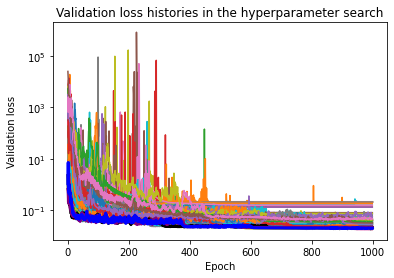

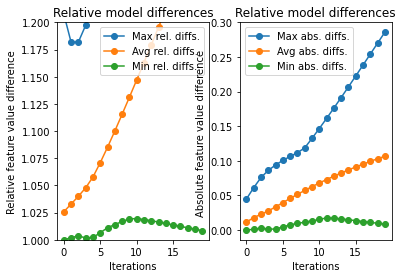

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


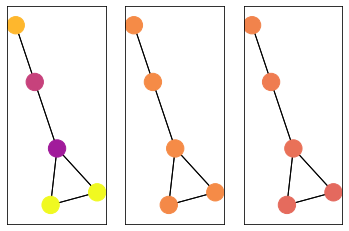

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
The ground truth model finished the run outputting this graph:


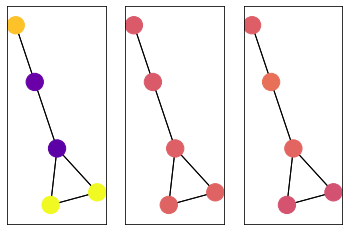

tensor([[1.0521, 0.5966, 0.5323],
        [1.0109, 0.5944, 0.5428],
        [0.1609, 0.5844, 0.6040],
        [0.1985, 0.5657, 0.6373],
        [0.8678, 0.5662, 0.5783]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                      3
loss                     0.035935
score                    0.571514
equation        (xs2 - 0.4982733)
sympy_format      xs2 - 0.4982733
Name: 1, dtype: object, complexity                                                     13
loss                                                     0.001671
score                                                    0.606413
equation        (((((xs2 + -0.2690277) * 2.242675) - (xt2 - xt...
sympy_format    0.743866680967*xs2 - 0.33168724*xs3 - 0.331687...
Name: 6, dtype: object], 'update_sr_result': [complexity                                                     11
loss                                                      0.00009
score                                                    1.040358
equation    

In [84]:
gn_a2, hps_a2, model_a2, sr_a2 = view_run_results('runs/searches2_act_inh_simple')

In [85]:
decision_tree_paths(get_hyperparam_dtree(hps_a2, eq_threshold=1))

[[(3, (64,)), -1.6037371662371906],
 [(3, (128,)), -1.5930519198570239],
 [(3, (256,)), -1.5763834181026843],
 [(3, (32,)), -1.561869373141897],
 [(3, (512,)), -1.5296284992329485],
 [(3, (32, 32)), -1.512510905431916],
 [(3, (16, 16, 16)),
  ('regularization_coefficient', False),
  -1.498327143236621],
 [(3, (64, 64)), -1.4867406816422535],
 [(3, (1024,)), -1.471734002238873],
 [(3, (2048,)), -1.4052253592656663],
 [(3, (4096,)), -1.2059268279241835],
 [(3, (16, 16, 16)),
  ('regularization_coefficient', 0.001),
  -1.1154346734695226],
 [(3, (32, 32, 32)),
  ('regularization_coefficient', False),
  -1.0895568560149589],
 [(3, (32, 32, 32)),
  ('regularization_coefficient', 0.001),
  -0.9668132966169907],
 [(3, (16, 16, 16, 16)),
  ('regularization_coefficient', False),
  -0.8779501597246341],
 [(3, (64, 64, 64)), -0.8144693425785711],
 [(3, (16, 16, 16, 16)),
  ('regularization_coefficient', 0.001),
  -0.7533617861657466],
 [(3, (128, 128)), -0.7404818360033089]]

Observations: 
- shallow but wide best

Theory: 
- large nets (which should be more general) just don't have time to train properly, maybe because LR drops too quickly

## Search over big nets

Stats for 20 steps for node features:
Greatest relative difference: 159.65665578842163%
Average relative difference: 116.71872675418852%
Smallest relative difference: 100.06983280181885%
Greatest absolute difference: 0.2888670265674591
Average absolute difference: 0.08989079846069217
Smallest absolute difference: 0.0006816387176513672%


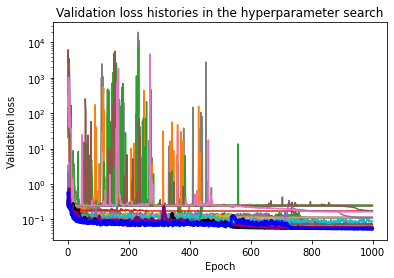

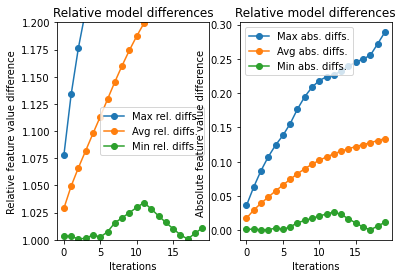

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


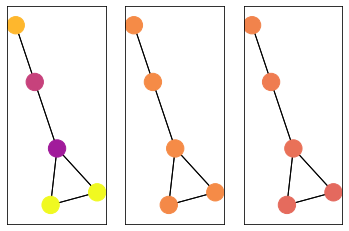

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
The ground truth model finished the run outputting this graph:


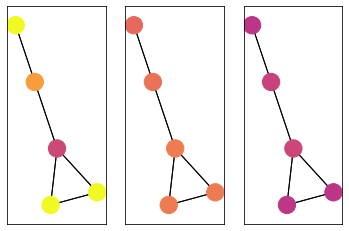

tensor([[1.0745, 0.6747, 0.4398],
        [1.0740, 0.6740, 0.4444],
        [0.5072, 0.6779, 0.4992],
        [0.7731, 0.6482, 0.4881],
        [1.0615, 0.6176, 0.4392]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                                                      9
loss                                                     0.000083
score                                                    1.871689
equation        ((((xt2 * 0.29587802) - xs2) + 0.4007553) * 0....
sympy_format    -0.6651843*xs2 + 0.196813413619086*xt2 + 0.266...
Name: 4, dtype: object, complexity                                                      9
loss                                                     0.000063
score                                                    1.909212
equation        (((xs2 - (xt2 * 0.29601803)) + -0.28415912) * ...
sympy_format    -0.6021698*xs2 + 0.178253117921494*xt2 + 0.171...
Name: 4, dtype: object], 'update_sr_result': [complexity                                        

In [88]:
gn_ab, hps_ab, model_ab, sr_ab = view_run_results('runs/searches_bignet_act_inh_simple')

## Settings based on the paper

Stats for 20 steps for node features:
Greatest relative difference: 564.8801326751709%
Average relative difference: 128.89846861362457%
Smallest relative difference: 100.0129222869873%
Greatest absolute difference: 0.362096905708313
Average absolute difference: 0.08003039718605579
Smallest absolute difference: 0.00012129545211791992%


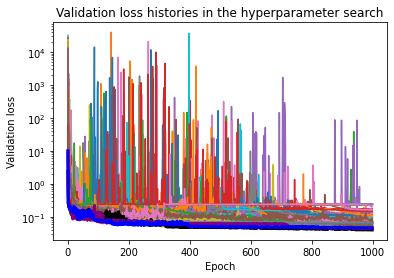

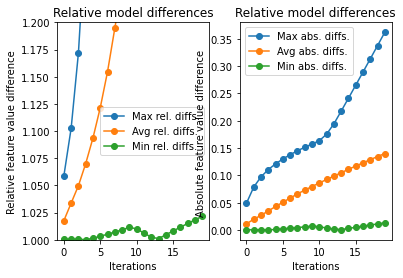

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


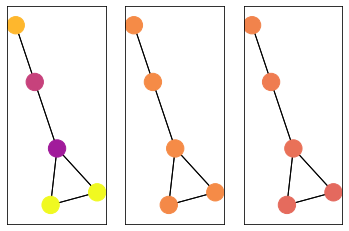

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
The ground truth model finished the run outputting this graph:


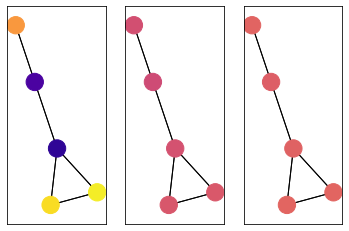

tensor([[0.9726, 0.5595, 0.6026],
        [0.9308, 0.5580, 0.6042],
        [0.0616, 0.5384, 0.5918],
        [0.1221, 0.5146, 0.5818],
        [0.7597, 0.5283, 0.5979]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                3
loss               0.020265
score              0.957269
equation        (xs2 - xt2)
sympy_format      xs2 - xt2
Name: 1, dtype: object, complexity                                                      9
loss                                                     0.000874
score                                                     0.83703
equation        ((((xs3 - 0.21602562) * 1.7573786) - xt3) * 0....
sympy_format    0.75572261968331*xs3 - 0.43002835*xt3 - 0.1632...
Name: 4, dtype: object], 'update_sr_result': [complexity                                                     11
loss                                                     0.002723
score                                                    0.924048
equation        (a1 - ((xt1 - a2) / ((a1 /

In [87]:
gn_ap, hps_ap, model_ap, sr_ap = view_run_results('runs/search_paper_act_inh_simple')

In [99]:
get_hyperparam_dtree(hps_ap, eq_threshold=0.75)

<<<DTREE on <ATTRIBUTE adam_betas taking values ((0.7, 0.97), (0.8, 0.98), (0.9, 0.999))
  --((0.7, 0.97))-->
  <<<DTREE on <ATTRIBUTE lr_scheduler_patience taking values (50, 250)
    --(50)-->
    <<<DTREE on <ATTRIBUTE adam_weight_decay taking values (0, 1e-08, 0.0001)
      --(0)-->
      <<<DTREE on <ATTRIBUTE batch_size taking values (1, 4)
        --(1)-->
        <LEAF of avg.val (-1.173185938524548, 1) with 5 examples and variance 0.005815736433611868>
        --(4)-->
        <LEAF of avg.val (-1.2488953350499723, 1) with 5 examples and variance 2.768108432227301e-05> >>>
      --(1e-08)-->
      <LEAF of avg.val (-1.0993355221721233, 1) with 10 examples and variance 0.007521784730156672>
      --(0.0001)-->
      <LEAF of avg.val (-1.1586672440623327, 1) with 10 examples and variance 0.005676562439924838> >>>
    --(250)-->
    <LEAF of avg.val (-1.0889037334667258, 1) with 30 examples and variance 0.002824245458124766> >>>
  --((0.8, 0.98))-->
  <LEAF of avg.val (-1.0656710

In [100]:
decision_tree_paths(get_hyperparam_dtree(hps_ap, eq_threshold=0.75))

[[('adam_betas', (0.7, 0.97)),
  ('lr_scheduler_patience', 50),
  ('adam_weight_decay', 0),
  ('batch_size', 4),
  -1.2488953350499723],
 [('adam_betas', (0.7, 0.97)),
  ('lr_scheduler_patience', 50),
  ('adam_weight_decay', 0),
  ('batch_size', 1),
  -1.1731859385245478],
 [('adam_betas', (0.7, 0.97)),
  ('lr_scheduler_patience', 50),
  ('adam_weight_decay', 0.0001),
  -1.1586672440623327],
 [('adam_betas', (0.7, 0.97)),
  ('lr_scheduler_patience', 50),
  ('adam_weight_decay', 1e-08),
  -1.0993355221721233],
 [('adam_betas', (0.7, 0.97)),
  ('lr_scheduler_patience', 250),
  -1.0889037334667258],
 [('adam_betas', (0.8, 0.98)), -1.0656710760729964],
 [('adam_betas', (0.9, 0.999)), -0.970388813791122]]